In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df["MEDV"] = boston["target"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


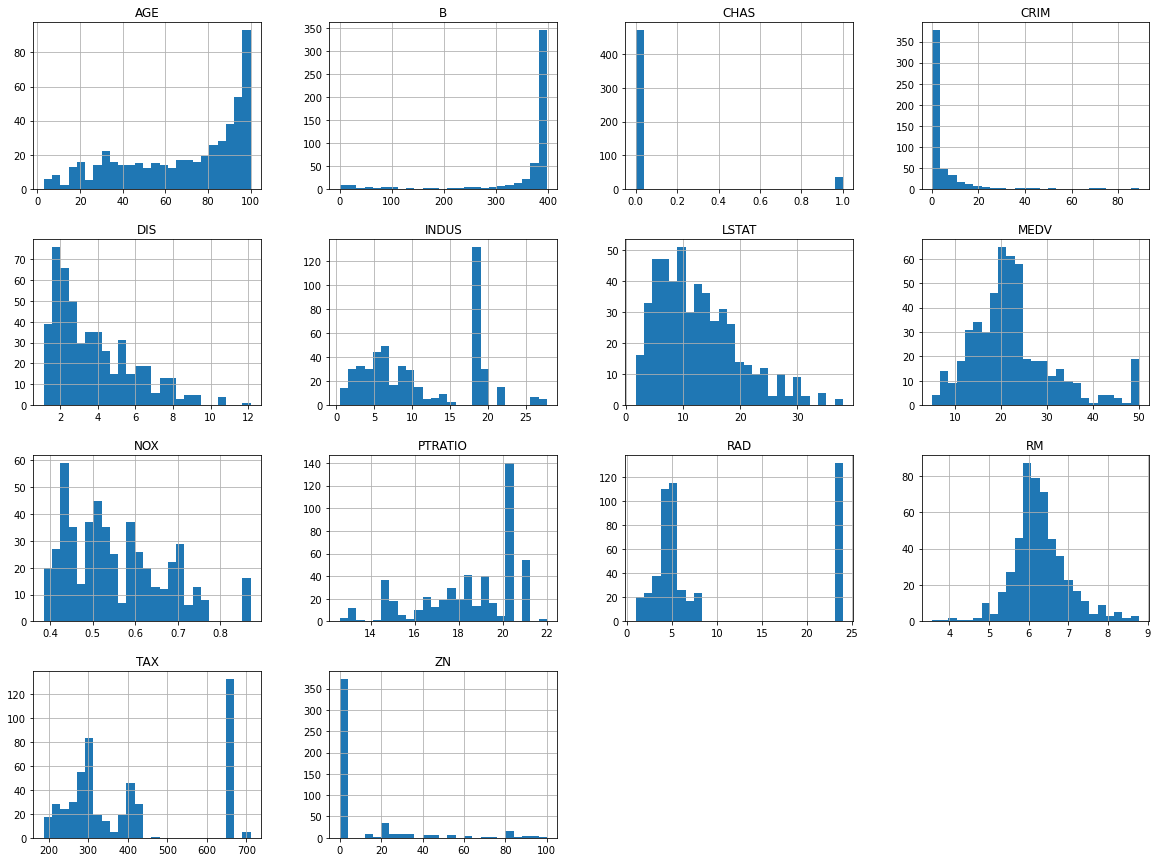

In [8]:
df.hist(bins = 25, figsize = (20,15));

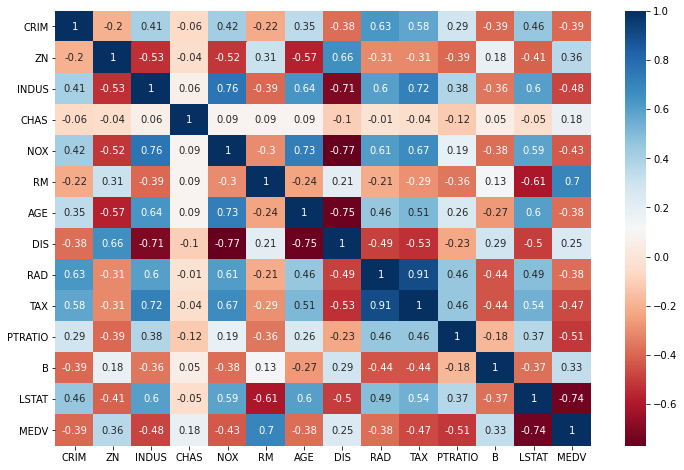

In [9]:
plt.figure(figsize = (12, 8))

korrelationsmatrix = df.corr().round(2)
sns.heatmap(korrelationsmatrix, annot = True, cmap = "RdBu");

In [10]:
# Lösung

def pearson_r(x: np.array, y: np.array) -> float:
    """Takes as input two vectors of same length and returns the pearson correlation coefficient"""
    xdiff = x - np.mean(x)
    ydiff = y - np.mean(y)
    cov = xdiff.dot(ydiff)
    return round(cov / (np.sqrt(xdiff.dot(xdiff)) * np.sqrt(ydiff.dot(ydiff))), 2)

print("r(RM, MEDV): ", pearson_r(df["RM"], df["MEDV"]))
print("r(LSTAT, MEDV): ", pearson_r(df["LSTAT"], df["MEDV"]))

r(RM, MEDV):  0.7
r(LSTAT, MEDV):  -0.74


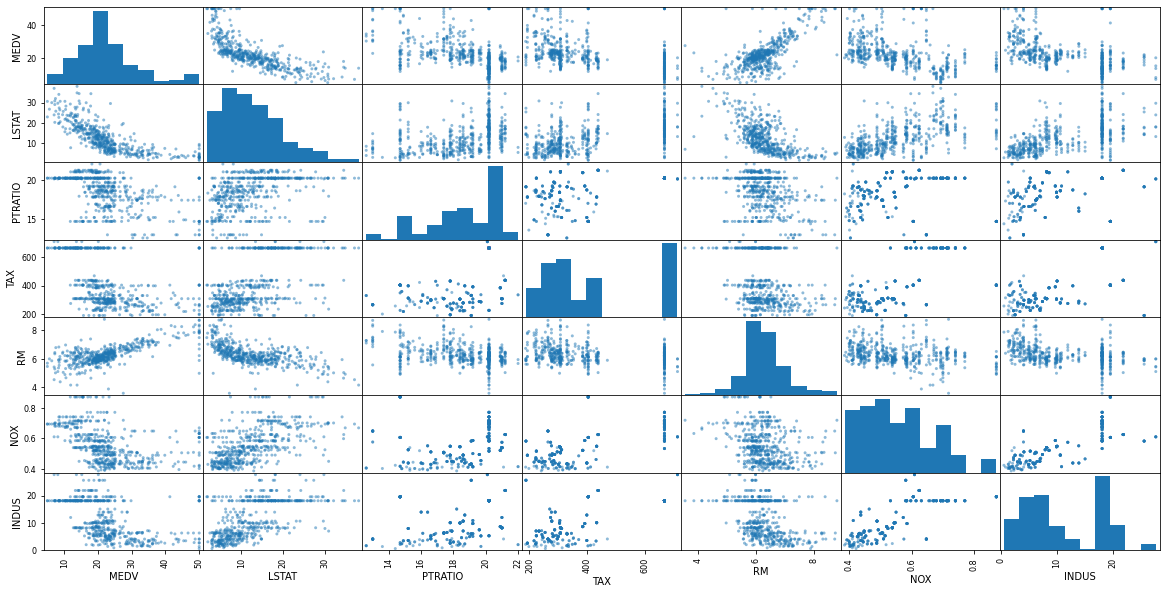

In [11]:
from pandas.plotting import scatter_matrix

attributes = ["MEDV", "LSTAT", "PTRATIO", "TAX", "RM", "NOX", "INDUS"]
scatter_matrix(df[attributes], figsize = (20, 10));

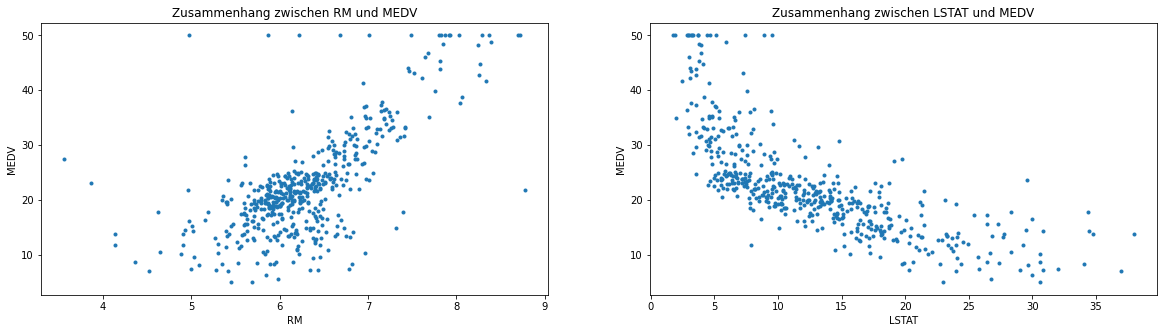

In [12]:
features = ["RM", "LSTAT"]
target = df["MEDV"]

plt.figure(figsize = (20, 5))
    
for index, column in enumerate(features):
    plt.subplot(1, len(features), index + 1)
    x = df[column]
    y = target
    plt.scatter(x, y, marker = ".")
    plt.title(f"Zusammenhang zwischen {column} und MEDV")
    plt.xlabel(column)
    plt.ylabel("MEDV")

In [13]:
df = df.drop(df[df["MEDV"] == 50].index)
print(df.shape)

(490, 14)


In [14]:
from sklearn.model_selection import train_test_split

train, test_val = train_test_split(df, test_size = 0.3, random_state = 42)
val, test = train_test_split(test_val, test_size = 0.3, random_state = 42)

print(train.shape)
print(val.shape)
print(test.shape)

(343, 14)
(102, 14)
(45, 14)


In [15]:
test.to_csv("data/boston_validation_data.csv")

In [16]:
dir()

['In',
 'Out',
 '_',
 '_2',
 '_4',
 '_5',
 '_6',
 '_7',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'attributes',
 'boston',
 'column',
 'df',
 'exit',
 'features',
 'get_ipython',
 'index',
 'korrelationsmatrix',
 'load_boston',
 'np',
 'pd',
 'pearson_r',
 'plt',
 'quit',
 'scatter_matrix',
 'sns',
 'target',
 'test',
 'test_val',
 'train',
 'train_test_split',
 'val',
 'x',
 'y']

In [17]:
del test_val, test

In [18]:
dir()

['In',
 'Out',
 '_',
 '_16',
 '_2',
 '_4',
 '_5',
 '_6',
 '_7',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'attributes',
 'boston',
 'column',
 'df',
 'exit',
 'features',
 'get_ipython',
 'index',
 'korrelationsmatrix',
 'load_boston',
 'np',
 'pd',
 'pearson_r',
 'plt',
 'quit',
 'scatter_matrix',
 'sns',
 'target',
 'train',
 'train_test_split',
 'val',
 'x',
 'y']

In [19]:
X_train_rm = np.array(train["RM"]).reshape(train["RM"].size, 1)
y_train = np.array(train["MEDV"]).reshape(train["MEDV"].size, 1)

X_val_rm = np.array(val["RM"]).reshape(val["RM"].size, 1)
y_val = np.array(val["MEDV"]).reshape(val["MEDV"].size, 1)

In [20]:
from sklearn.linear_model import LinearRegression

modell_rm = LinearRegression()
modell_rm.fit(X_train_rm, y_train)

print("Y-Achsenabschnitt: ", round(modell_rm.intercept_[0], 3))
print("Koeffizient: ", round(modell_rm.coef_[0][0], 3))

Y-Achsenabschnitt:  -29.383
Koeffizient:  8.207


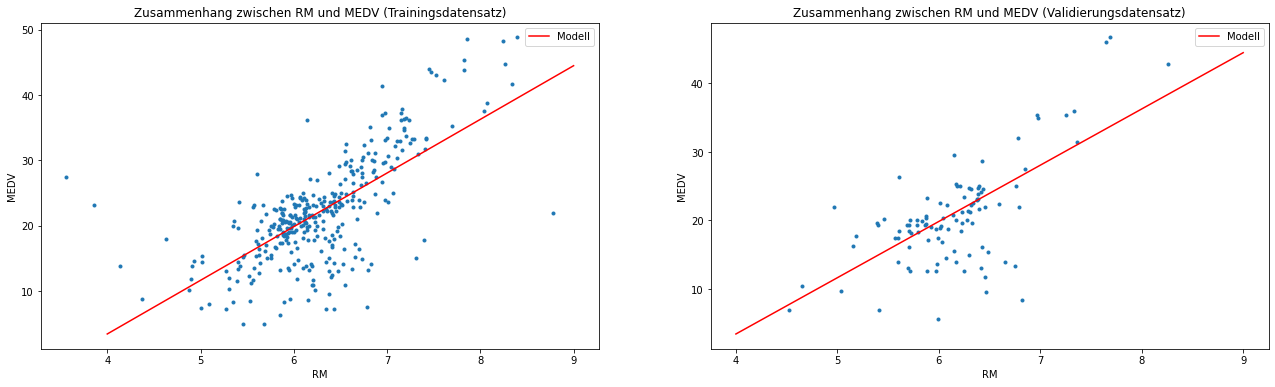

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (22, 6))

x_ = np.arange(4, 10).reshape(6, 1)
y_ = modell_rm.predict(x_)

ax1.scatter(train["RM"], train["MEDV"], marker = ".", label = None)
ax1.plot(x_, y_, color = "red", label = "Modell")
ax2.scatter(val["RM"], val["MEDV"], marker = ".", label = None)
ax2.plot(x_, y_, color = "red", label = "Modell")

ax1.set_title("Zusammenhang zwischen RM und MEDV (Trainingsdatensatz)")
ax2.set_title("Zusammenhang zwischen RM und MEDV (Validierungsdatensatz)")
ax1.set_xlabel("RM"); ax2.set_xlabel("RM")
ax1.set_ylabel("MEDV"); ax2.set_ylabel("MEDV")
ax1.legend(); ax2.legend();

In [22]:
from sklearn.metrics import mean_squared_error

print(f"RMSE (training): {np.sqrt(mean_squared_error(modell_rm.predict(X_train_rm), y_train))}")
print(f"RMSE (valid): {np.sqrt(mean_squared_error(modell_rm.predict(X_val_rm), y_val))}")

RMSE (training): 5.82152620316176
RMSE (valid): 5.4763114752449775


In [23]:
X_train_lstat = np.array(train["LSTAT"]).reshape(train["LSTAT"].size, 1)
X_val_lstat = np.array(val["LSTAT"]).reshape(val["LSTAT"].size, 1)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

best_val_rmse = float("inf")
for n in range(2, 16):
    poly = PolynomialFeatures(degree = n, include_bias = False)
    X_train_lstat_poly = poly.fit_transform(X_train_lstat)
    X_val_lstat_poly = poly.fit_transform(X_val_lstat)
    
    modell_lstat = LinearRegression()
    modell_lstat.fit(X_train_lstat_poly, y_train)
    
    train_rmse = np.sqrt(mean_squared_error(modell_lstat.predict(X_train_lstat_poly), y_train))
    val_rmse = np.sqrt(mean_squared_error(modell_lstat.predict(X_val_lstat_poly), y_val))
    
    print(f"Polynomenmodell (Grad {n})")
    
    print(f"RMSE (training): {train_rmse}")
    print(f"RMSE (valid): {val_rmse}")
    print("--------------------")
    
    if val_rmse < best_val_rmse:
        final_train_rmse = train_rmse
        best_val_rmse = val_rmse
        best_n = n
        best_modell_lstat = modell_lstat
        
print(f"Bestes Modell: Polynomenmodell Grad {best_n}")
print("Finale Fehlermetriken:")
print(f"RMSE (training): {final_train_rmse}")
print(f"RMSE (valid): {best_val_rmse}")

Polynomenmodell (Grad 2)
RMSE (training): 4.698484246893784
RMSE (valid): 4.493242122724828
--------------------
Polynomenmodell (Grad 3)
RMSE (training): 4.66730105620881
RMSE (valid): 4.3278720987657255
--------------------
Polynomenmodell (Grad 4)
RMSE (training): 4.585960047966809
RMSE (valid): 4.2258625634763085
--------------------
Polynomenmodell (Grad 5)
RMSE (training): 4.548853532111695
RMSE (valid): 4.119297648421512
--------------------
Polynomenmodell (Grad 6)
RMSE (training): 4.548752486182796
RMSE (valid): 4.118170495874095
--------------------
Polynomenmodell (Grad 7)
RMSE (training): 4.5465925595168235
RMSE (valid): 4.110508993886247
--------------------
Polynomenmodell (Grad 8)
RMSE (training): 4.52203475415297
RMSE (valid): 4.160408993154684
--------------------
Polynomenmodell (Grad 9)
RMSE (training): 4.521487302588728
RMSE (valid): 4.129850331288392
--------------------
Polynomenmodell (Grad 10)
RMSE (training): 4.527199840049497
RMSE (valid): 4.282003141408298
--

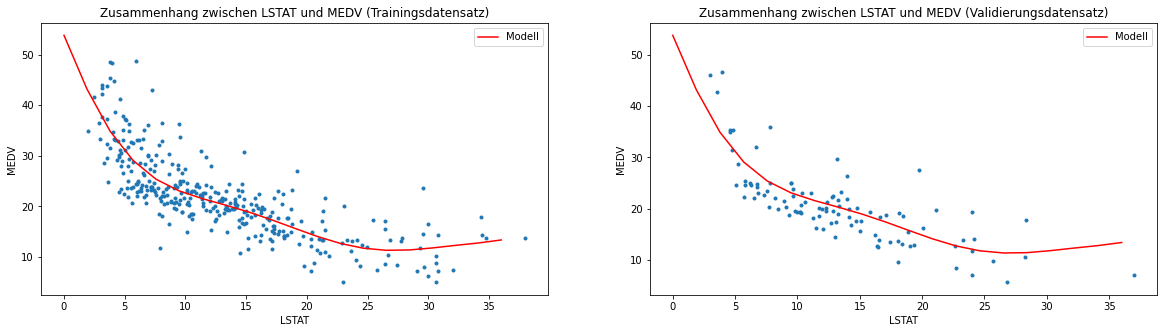

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))

x_ = np.linspace(0, 36, 20).reshape(20, 1)
poly = PolynomialFeatures(degree = best_n, include_bias = False)

x_poly = poly.fit_transform(x_)
y_ = best_modell_lstat.predict(x_poly)

ax1.scatter(train["LSTAT"], train["MEDV"], marker = ".", label = None)
ax1.plot(x_, y_, color = "red", label = "Modell")
ax2.scatter(val["LSTAT"], val["MEDV"], marker = ".", label = None)
ax2.plot(x_, y_, color = "red", label = "Modell")

ax1.set_title("Zusammenhang zwischen LSTAT und MEDV (Trainingsdatensatz)")
ax2.set_title("Zusammenhang zwischen LSTAT und MEDV (Validierungsdatensatz)")
ax1.set_xlabel("LSTAT"); ax2.set_xlabel("LSTAT")
ax1.set_ylabel("MEDV"); ax2.set_ylabel("MEDV")
ax1.legend(); ax2.legend();

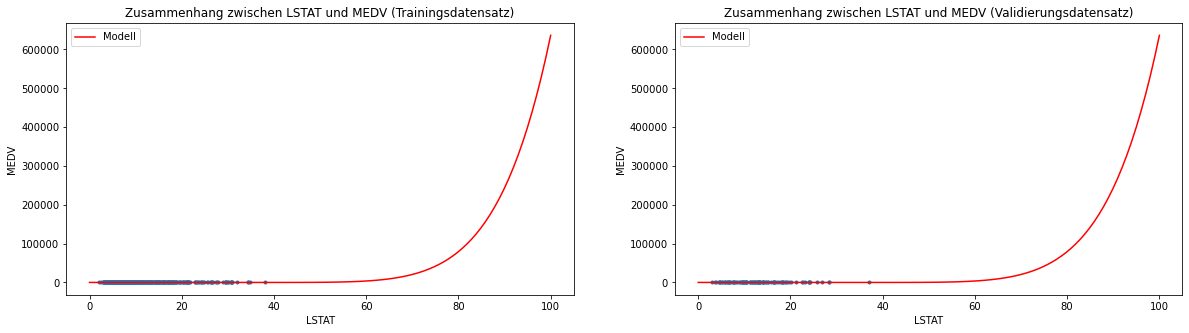

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))

x_ = np.linspace(0, 100, 100).reshape(100, 1)
poly = PolynomialFeatures(degree = best_n, include_bias = False)

x_poly = poly.fit_transform(x_)
y_ = best_modell_lstat.predict(x_poly)

ax1.scatter(train["LSTAT"], train["MEDV"], marker = ".", label = None)
ax1.plot(x_, y_, color = "red", label = "Modell")
ax2.scatter(val["LSTAT"], val["MEDV"], marker = ".", label = None)
ax2.plot(x_, y_, color = "red", label = "Modell")

ax1.set_title("Zusammenhang zwischen LSTAT und MEDV (Trainingsdatensatz)")
ax2.set_title("Zusammenhang zwischen LSTAT und MEDV (Validierungsdatensatz)")
ax1.set_xlabel("LSTAT"); ax2.set_xlabel("LSTAT")
ax1.set_ylabel("MEDV"); ax2.set_ylabel("MEDV")
ax1.legend(); ax2.legend();

In [27]:
poly = PolynomialFeatures(degree = 3, include_bias = False)
X_train_lstat_poly = poly.fit_transform(X_train_lstat)
X_val_lstat_poly = poly.fit_transform(X_val_lstat)
    
modell_lstat = LinearRegression()
modell_lstat.fit(X_train_lstat_poly, y_train)

train_rmse = np.sqrt(mean_squared_error(modell_lstat.predict(X_train_lstat_poly), y_train))
val_rmse = np.sqrt(mean_squared_error(modell_lstat.predict(X_val_lstat_poly), y_val))
    
print(f"RMSE (training): {train_rmse}")
print(f"RMSE (valid): {val_rmse}")

RMSE (training): 4.66730105620881
RMSE (valid): 4.3278720987657255


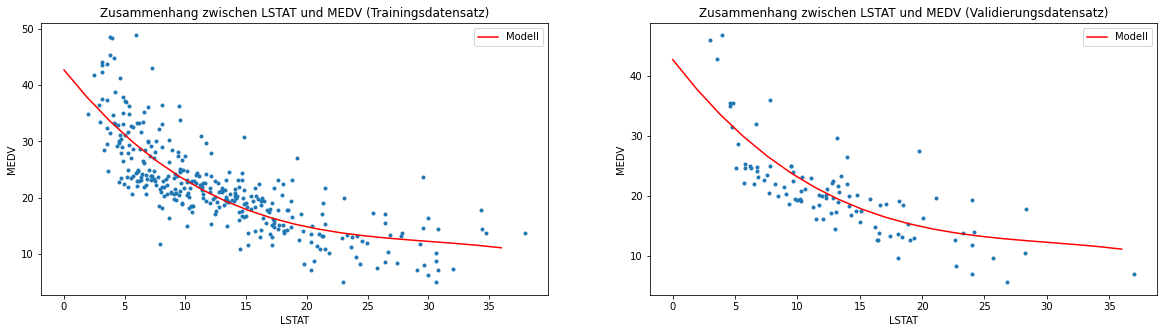

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))

x_ = np.linspace(0, 36, 20).reshape(20, 1)
poly = PolynomialFeatures(degree = 3, include_bias = False)

x_poly = poly.fit_transform(x_)
y_ = modell_lstat.predict(x_poly)

ax1.scatter(train["LSTAT"], train["MEDV"], marker = ".", label = None)
ax1.plot(x_, y_, color = "red", label = "Modell")
ax2.scatter(val["LSTAT"], val["MEDV"], marker = ".", label = None)
ax2.plot(x_, y_, color = "red", label = "Modell")

ax1.set_title("Zusammenhang zwischen LSTAT und MEDV (Trainingsdatensatz)")
ax2.set_title("Zusammenhang zwischen LSTAT und MEDV (Validierungsdatensatz)")
ax1.set_xlabel("LSTAT"); ax2.set_xlabel("LSTAT")
ax1.set_ylabel("MEDV"); ax2.set_ylabel("MEDV")
ax1.legend(); ax2.legend();

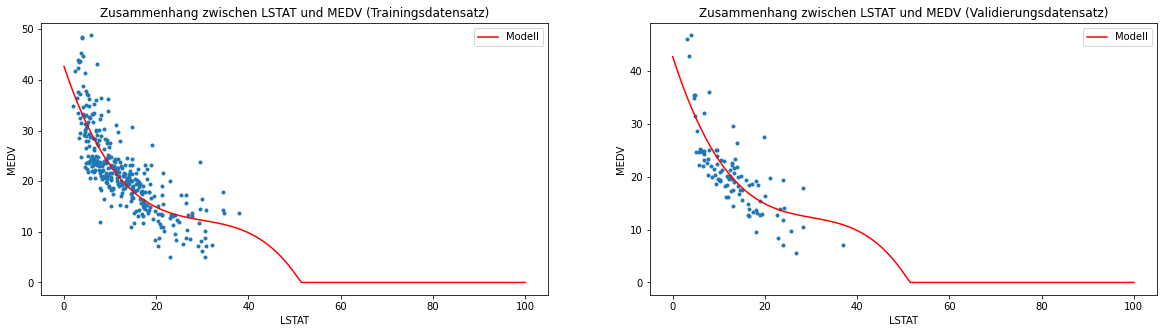

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))

x_ = np.linspace(0, 100, 100).reshape(100, 1)
poly = PolynomialFeatures(degree = 3, include_bias = False)

x_poly = poly.fit_transform(x_)
y_ = modell_lstat.predict(x_poly)
y_[y_ < 0] = 0

ax1.scatter(train["LSTAT"], train["MEDV"], marker = ".", label = None)
ax1.plot(x_, y_, color = "red", label = "Modell")
ax2.scatter(val["LSTAT"], val["MEDV"], marker = ".", label = None)
ax2.plot(x_, y_, color = "red", label = "Modell")

ax1.set_title("Zusammenhang zwischen LSTAT und MEDV (Trainingsdatensatz)")
ax2.set_title("Zusammenhang zwischen LSTAT und MEDV (Validierungsdatensatz)")
ax1.set_xlabel("LSTAT"); ax2.set_xlabel("LSTAT")
ax1.set_ylabel("MEDV"); ax2.set_ylabel("MEDV")
ax1.legend(); ax2.legend();

In [30]:
X_train_rm = np.array(train["RM"]).reshape(train["RM"].size, 1)
X_train_lstat = np.array(train["LSTAT"]).reshape(train["LSTAT"].size, 1)
y_train = np.array(train["MEDV"]).reshape(train["MEDV"].size, 1)

X_val_rm = np.array(val["RM"]).reshape(val["RM"].size, 1)
X_val_lstat = np.array(val["LSTAT"]).reshape(val["LSTAT"].size, 1)
y_val = np.array(val["MEDV"]).reshape(val["MEDV"].size, 1)

poly = PolynomialFeatures(degree = 3, include_bias = False)
X_train_lstat_poly = poly.fit_transform(X_train_lstat)
X_val_lstat_poly = poly.fit_transform(X_val_lstat)

X_train = np.c_[X_train_rm, X_train_lstat_poly]
X_val = np.c_[X_val_rm, X_val_lstat_poly]

In [31]:
mult_modell = LinearRegression()
mult_modell.fit(X_train, y_train)

train_rmse = np.sqrt(mean_squared_error(mult_modell.predict(X_train), y_train))
val_rmse = np.sqrt(mean_squared_error(mult_modell.predict(X_val), y_val))
    
print(f"RMSE (training): {train_rmse}")
print(f"RMSE (valid): {val_rmse}")

print("Koeffizienten: ", mult_modell.coef_)
print("Y-Achsenabschnitt: ", mult_modell.intercept_)

RMSE (training): 4.29934569282601
RMSE (valid): 4.129730623844167
Koeffizienten:  [[ 3.76220182e+00 -1.32101385e+00  1.09883820e-02  3.66010270e-04]]
Y-Achsenabschnitt:  [11.40674474]


In [32]:
from mpl_toolkits.mplot3d import Axes3D

X = df[["RM", "LSTAT"]]
xx1, xx2 = np.meshgrid(np.linspace(X.RM.min(), X.RM.max(), 20), 
                       np.linspace(X.LSTAT.min(), X.LSTAT.max(), 20))

intercept = mult_modell.intercept_[0]
theta_rm = mult_modell.coef_[0][0]
theta1_lstat = mult_modell.coef_[0][1]
theta2_lstat = mult_modell.coef_[0][2]
theta3_lstat = mult_modell.coef_[0][3]

Z = intercept + theta_rm*xx1 + theta1_lstat*xx2 + theta2_lstat*xx2**2 + theta3_lstat*xx2**3

In [33]:
# Wenn du Jupyter Lab verwendest
%matplotlib inline

# Wenn du Jupyter Notebook verwendest
#matplotlib notebook

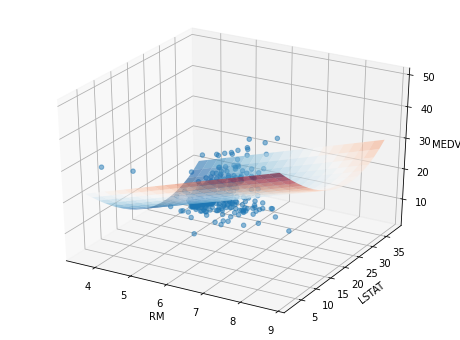

In [34]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_train_rm, X_train_lstat, y_train, marker = "o", alpha = 0.5)
surf = ax.plot_surface(xx1, xx2, Z, cmap = plt.cm.RdBu_r, alpha = 0.6, linewidth = 0)
ax.set_xlabel("RM")
ax.set_ylabel("LSTAT")
ax.set_zlabel("MEDV");

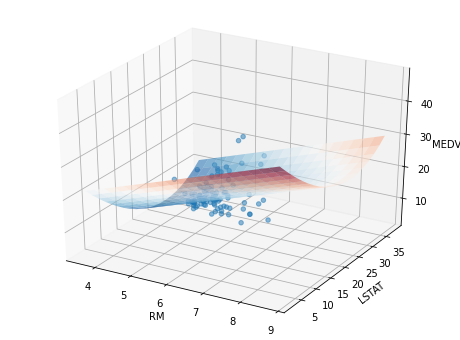

In [35]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_val_rm, X_val_lstat, y_val, marker = "o", alpha = 0.5)
surf = ax.plot_surface(xx1, xx2, Z, cmap = plt.cm.RdBu_r, alpha=0.6, linewidth = 0)
ax.set_xlabel("RM")
ax.set_ylabel("LSTAT")
ax.set_zlabel("MEDV");

In [42]:
test = pd.read_csv("data/boston_validation_data.csv", index_col = 0)

In [43]:
test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
198,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.3090,2.0,329.0,12.6,392.20,6.62,34.6
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32,30.8
23,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4.0,307.0,21.0,394.54,19.88,14.5
218,0.11069,0.0,13.89,1.0,0.550,5.951,93.8,2.8893,5.0,276.0,16.4,396.90,17.92,21.5
476,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68,16.7


In [49]:
X_test_rm = np.array(test["RM"]).reshape(test["RM"].size, 1)
X_test_lstat = np.array(test["LSTAT"]).reshape(test["LSTAT"].size, 1)
y_test = np.array(test["MEDV"]).reshape(test["MEDV"].size, 1)

poly = PolynomialFeatures(degree = 3, include_bias = False)
X_test_lstat_poly = poly.fit_transform(X_test_lstat)

X_test = np.c_[X_test_rm, X_test_lstat_poly]

X_test.shape

(45, 4)

In [51]:
test_rmse = np.sqrt(mean_squared_error(mult_modell.predict(X_test), y_test))
    
print(f"RMSE (test): {test_rmse}")

RMSE (test): 3.728451746751027
